<a href="https://colab.research.google.com/github/albertorekena/education-improvement/blob/master/Isolation_forest_02_portuguese_modelling_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import make_scorer,mean_squared_error,mean_absolute_error
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [297]:
df_por = pd.read_pickle('df_por-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [298]:
df_por.shape

(649, 44)

In [0]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Linear Regression

In [301]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X_test)

In [303]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.864258,5
1,3.607178,3
2,4.058594,5
3,3.522705,3
4,2.918213,3


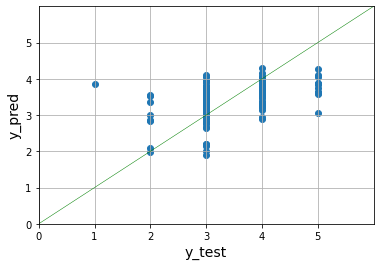

In [304]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [0]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [306]:
rmse(y_pred,y_test)

0.7202884240393945

## Decision Tree Regression

In [0]:
rmse_scorer = make_scorer(rmse,greater_is_better = False)

In [308]:
param_grid = {'min_samples_leaf':[1,5,10,20,50,100],'max_depth':[1,2,5,10,20,30,50]}

grid_search_cv = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid = param_grid,cv=5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
             pre_di

In [309]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred = grid_search_cv.predict(X_test)

In [311]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.829897,5
1,3.344828,3
2,3.829897,5
3,3.829897,3
4,3.344828,3


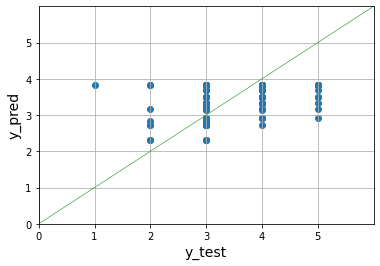

In [312]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [313]:
rmse(y_pred,y_test)

0.762376439213706

## Random Forest Regression

In [314]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [315]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = grid_search_cv.predict(X_test)

In [317]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.624022,5
1,3.348413,3
2,3.559716,5
3,3.494199,3
4,3.254768,3


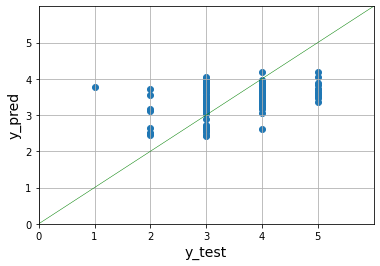

In [318]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [319]:
rmse(y_pred,y_test)

0.7281727747934328

# **Isolation**

In [0]:
# Isolation Forest ----

# training the model
iso_forest = IsolationForest(n_estimators=300, contamination="auto")
iso_forest = iso_forest.fit(df_por)

# predictions
isof_outliers = iso_forest.predict(df_por)

In [321]:
sklearn_score_anomalies = abs(iso_forest.score_samples(df_por))
sklearn_score_anomalies

array([0.51988437, 0.46201973, 0.49515129, 0.47912847, 0.44731607,
       0.44501237, 0.42833324, 0.52342113, 0.47956213, 0.44575994,
       0.47695404, 0.48509527, 0.48312542, 0.43790789, 0.51286233,
       0.46800113, 0.46160677, 0.46982189, 0.51774976, 0.49977035,
       0.46367004, 0.54660046, 0.45931882, 0.44223366, 0.49788734,
       0.48588673, 0.42901227, 0.51028759, 0.51055535, 0.52944315,
       0.52706896, 0.45661734, 0.4960219 , 0.4515085 , 0.43759835,
       0.49891891, 0.467626  , 0.51734062, 0.49748171, 0.49719684,
       0.46127211, 0.53499743, 0.47851071, 0.49983094, 0.52160051,
       0.5009372 , 0.48745528, 0.49069548, 0.4569942 , 0.5283262 ,
       0.45326473, 0.46340321, 0.58848226, 0.47180483, 0.50208886,
       0.45998409, 0.46437138, 0.51126734, 0.51193465, 0.448356  ,
       0.52176017, 0.57876152, 0.49807673, 0.50419197, 0.52412284,
       0.47242295, 0.56675659, 0.45031892, 0.51047025, 0.51360835,
       0.46047177, 0.43772839, 0.48877619, 0.45334304, 0.45527

In [322]:
isoF_outliers_values = df_por[iso_forest.predict(df_por) == -1]
isoF_outliers_values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
7,1,1,17,1,1,0,4,4,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,2,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
14,1,0,15,1,1,0,2,2,1,3,0,0,1,0,0,1,1,1,1,4,5,2,1,1,3,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
18,1,0,17,1,1,1,3,2,1,1,3,0,1,1,1,1,1,1,0,5,5,5,2,4,5,2,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
21,1,0,15,1,1,1,4,4,1,1,0,0,1,1,0,1,1,1,0,5,4,2,1,1,5,2,3,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
27,1,0,15,1,1,1,4,2,1,1,0,0,0,0,0,1,1,1,0,2,2,4,2,4,1,2,3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
28,1,0,16,1,0,0,3,4,1,2,0,1,1,1,1,1,1,1,0,5,3,3,1,1,5,2,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
29,1,0,16,1,1,1,4,4,1,2,0,0,1,1,1,1,1,1,1,4,4,5,5,5,5,2,3,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
30,1,0,15,1,1,1,4,4,1,2,0,0,1,1,0,0,1,1,0,5,4,2,3,4,5,2,3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
37,1,0,16,0,1,0,4,4,2,3,0,0,1,0,1,1,1,1,1,2,4,3,1,1,5,2,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [323]:
isoF_outliers_values.shape

(258, 44)

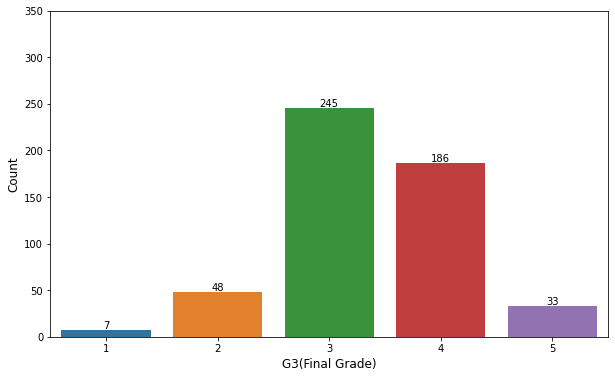

In [324]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

In [325]:
X_train.shape

(519, 43)

In [0]:
#Quitamos los outliers

X_train = np.delete(X_train,isoF_outliers_values.index.values.tolist(),axis=0)
y_train = np.delete(y_train,isoF_outliers_values.index.values.tolist(),axis=0)
#y = y.drop(isoF_outliers_values.index.values.tolist())

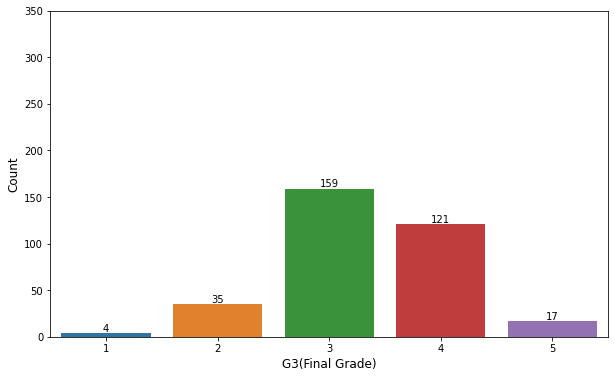

In [327]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

In [328]:
X_train.shape

(336, 43)

In [329]:
param_grid = {'min_samples_leaf':[1,10,50],'max_depth':[1,5,30],'n_estimators':[10,50,100]}

grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(),param_grid = param_grid,cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [330]:
grid_search_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = grid_search_cv.predict(X_test)

In [332]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.584195,5
1,3.546529,3
2,3.816054,5
3,3.340368,3
4,3.146148,3


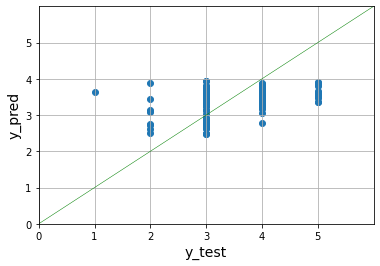

In [333]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [334]:
rmse(y_pred,y_test)

0.7242841702795645

In [335]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5911189248663677
Mean Squared Error: 0.5245875593175572
Root Mean Squared Error: 0.7242841702795645


## XGBoost 

In [336]:
parameters = {'max_depth':[1,5,30],'learning_rate':[0.01,0.1,0.3],'n_estimators':[10,50,100],'objective':'reg:squarederror'}

grid_search_cv = GridSearchCV(estimator = xgboost.XGBRegressor(silent = True),param_grid = param_grid,
                              cv = 5,scoring = rmse_scorer)
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 5, 30],
                         'min_samples_leaf': [1, 10, 50],
                        

In [337]:
grid_search_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1, verbosity=1)

In [0]:
y_pred = grid_search_cv.predict(X_test)

In [339]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.358294,5
1,3.594730,3
2,3.575711,5
3,3.360933,3
4,3.176385,3


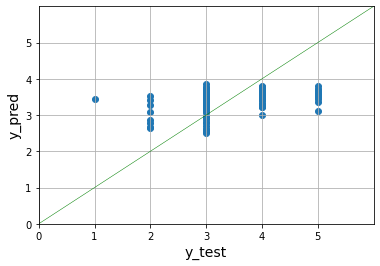

In [340]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [341]:
rmse(y_pred,y_test)

0.7152205107091086

## Neural Network 

In [0]:
sc = MinMaxScaler()

In [0]:
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [344]:
X_train.shape

(336, 43)

In [0]:
model = Sequential()

In [0]:
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [347]:
model.fit(X_train,y_train,validation_data = (X_test,y_test.values),batch_size = 128,epochs = 300)

Epoch 1/300
3/3 [==============================] - 0s 37ms/step - loss: 11.3913 - val_loss: 10.0308
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 10.4156 - val_loss: 8.7807
Epoch 3/300
3/3 [==============================] - 0s 17ms/step - loss: 8.9435 - val_loss: 7.2371
Epoch 4/300
3/3 [==============================] - 0s 14ms/step - loss: 7.4260 - val_loss: 5.5930
Epoch 5/300
3/3 [==============================] - 0s 15ms/step - loss: 6.0425 - val_loss: 3.9358
Epoch 6/300
3/3 [==============================] - 0s 14ms/step - loss: 4.1114 - val_loss: 2.3798
Epoch 7/300
3/3 [==============================] - 0s 14ms/step - loss: 2.7987 - val_loss: 1.1457
Epoch 8/300
3/3 [==============================] - 0s 17ms/step - loss: 2.3897 - val_loss: 0.5103
Epoch 9/300
3/3 [==============================] - 0s 13ms/step - loss: 2.1032 - val_loss: 0.4599
Epoch 10/300
3/3 [==============================] - 0s 14ms/step - loss: 2.9072 - val_loss: 0.4548
Epoch 11/300
3/3

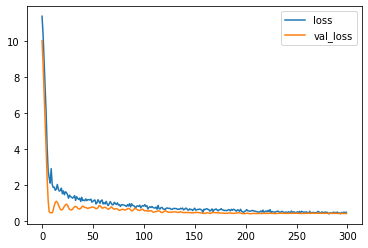

In [348]:
losses = pd.DataFrame(model.history.history)

losses.plot();

In [0]:
y_pred = model.predict(X_test)

In [350]:
y_pred = pd.DataFrame(y_pred)

df_temp = pd.concat([y_pred,y_test],axis = 1)
df_temp.columns = ['y_pred','y_test']

df_temp.head()

,y_pred,y_test
0,3.600045,5
1,3.256084,3
2,3.662573,5
3,3.276858,3
4,2.936234,3


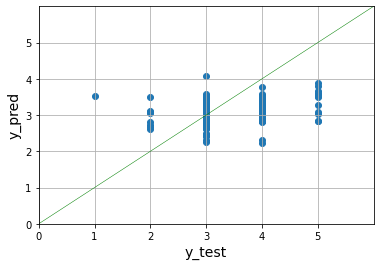

In [351]:
plt.scatter(df_temp['y_test'],df_temp['y_pred'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [352]:
rmse(y_pred,y_test)

0.8390695261572924

## Stacking 

In [0]:
X_base,X_meta,y_base,y_meta = train_test_split(X_train,y_train,test_size = 0.5,random_state = 42)

### Base Models 

In [0]:
model = DecisionTreeRegressor(min_samples_leaf = 20,max_depth = 10)
model.fit(X_base,y_base)

y_pred_dt_meta = model.predict(X_meta)
y_pred_dt_test = model.predict(X_test)

In [0]:
model = RandomForestRegressor(min_samples_leaf = 1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_rf_meta = model.predict(X_meta)
y_pred_rf_test = model.predict(X_test)

In [0]:
model = xgboost.XGBRegressor(silent = True,max_depth = 1,learning_rate = 0.1,n_estimators = 100)
model.fit(X_base,y_base)

y_pred_xgb_meta = model.predict(X_meta)
y_pred_xgb_test = model.predict(X_test)

In [357]:
model = Sequential()

model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(43,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

model.fit(X_train,y_train,validation_data = (X_base,y_base),batch_size = 128,epochs = 300)

Epoch 1/300
3/3 [==============================] - 0s 37ms/step - loss: 11.8060 - val_loss: 10.5871
Epoch 2/300
3/3 [==============================] - 0s 16ms/step - loss: 9.9417 - val_loss: 8.9649
Epoch 3/300
3/3 [==============================] - 0s 14ms/step - loss: 8.4547 - val_loss: 7.3008
Epoch 4/300
3/3 [==============================] - 0s 13ms/step - loss: 6.5326 - val_loss: 5.5441
Epoch 5/300
3/3 [==============================] - 0s 17ms/step - loss: 4.8996 - val_loss: 3.7202
Epoch 6/300
3/3 [==============================] - 0s 15ms/step - loss: 3.4233 - val_loss: 2.0533
Epoch 7/300
3/3 [==============================] - 0s 13ms/step - loss: 2.2278 - val_loss: 0.9634
Epoch 8/300
3/3 [==============================] - 0s 16ms/step - loss: 2.1454 - val_loss: 0.6919
Epoch 9/300
3/3 [==============================] - 0s 77ms/step - loss: 2.5158 - val_loss: 0.6860
Epoch 10/300
3/3 [==============================] - 0s 14ms/step - loss: 2.5126 - val_loss: 0.6794
Epoch 11/300
3/3 

In [0]:
y_pred_nn_meta = model.predict(X_meta)
y_pred_nn_test = model.predict(X_test)

In [359]:
y_pred_dt_meta = pd.DataFrame(y_pred_dt_meta)
y_pred_rf_meta = pd.DataFrame(y_pred_rf_meta)
y_pred_xgb_meta = pd.DataFrame(y_pred_xgb_meta)
y_pred_nn_meta = pd.DataFrame(y_pred_nn_meta)

df_X_meta = pd.concat([y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta],axis = 1)
df_X_meta.columns = ['y_pred_dt_meta','y_pred_rf_meta','y_pred_xgb_meta','y_pred_nn_meta']

df_X_meta.head()

,y_pred_dt_meta,y_pred_rf_meta,y_pred_xgb_meta,y_pred_nn_meta
0,3.852941,3.49,3.521413,2.988554
1,3.103448,3.42,3.298343,3.254194
2,3.304348,3.50,3.419274,3.288669
3,3.304348,3.56,3.535586,3.354147
4,3.103448,3.44,3.264235,3.041601


In [360]:
y_pred_dt_test = pd.DataFrame(y_pred_dt_test)
y_pred_rf_test = pd.DataFrame(y_pred_rf_test)
y_pred_xgb_test = pd.DataFrame(y_pred_xgb_test)
y_pred_nn_test = pd.DataFrame(y_pred_nn_test)

df_X_test = pd.concat([y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test],axis = 1)
df_X_test.columns = ['y_pred_dt_test','y_pred_rf_test','y_pred_xgb_test','y_pred_nn_test']

df_X_test.head()

,y_pred_dt_test,y_pred_rf_test,y_pred_xgb_test,y_pred_nn_test
0,3.852941,3.58,3.450499,3.302566
1,3.500000,3.34,3.526179,3.295636
2,3.852941,3.58,3.520066,3.669300
3,3.444444,3.22,3.487538,2.562825
4,3.500000,3.19,3.193613,3.022535


### Meta Model 

In [0]:
model = LinearRegression()
model.fit(df_X_meta,y_meta)

y_pred_test = model.predict(df_X_test)

In [362]:
y_pred_test = pd.DataFrame(y_pred_test)

df_temp = pd.concat([y_pred_test,y_test],axis = 1)
df_temp.columns = ['y_pred_test','y_test']

df_temp.head()

,y_pred_test,y_test
0,3.926808,5
1,3.764612,3
2,4.555320,5
3,2.452398,3
4,3.428650,3


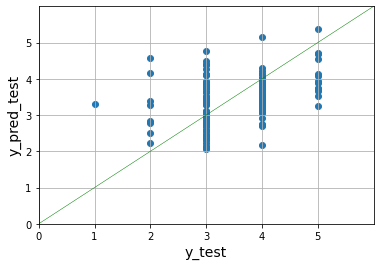

In [363]:
plt.scatter(df_temp['y_test'],df_temp['y_pred_test'])
plt.xlabel('y_test',fontsize = 14)
plt.ylabel('y_pred_test',fontsize = 14)
plt.xlim(0,6)
plt.ylim(0,6)
plt.xticks(list(range(0,6)))
plt.yticks(list(range(0,6)))
plt.grid()
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim,y_lim,color = 'g',linewidth = 0.5);

In [364]:
rmse(y_pred_test,y_test)

0.8209469133320826

In [365]:
mean_absolute_error(y_pred_test,y_test)

0.6516023026807715